## Exploratory Data Analisys
Derecha Diario

### Load tokens
"derecha diario" tokens

In [1]:
import pandas as pd
import numpy as np

In [2]:
tokens = pd.read_pickle('tokens/topic_tokens_der_new.pkl')

### Tf IDf Scores

#### TfIDf Transformation

In [3]:
from sklearn.feature_extraction.text import TfidfTransformer

In [4]:
tfidf_inf = TfidfTransformer().fit_transform(tokens[tokens.topics == 'inflation'].drop('topics', axis=1))

In [5]:
tfidf_inf_df = pd.DataFrame(tfidf_inf.todense(), columns = tokens[tokens.topics == 'inflation'].drop('topics', axis=1).columns)
tfidf_inf_df.shape

(33, 4690)

In [6]:
tfidf_ex = TfidfTransformer().fit_transform(tokens[tokens.topics == 'exchange'].drop('topics', axis=1))

In [7]:
tfidf_ex_df = pd.DataFrame(tfidf_ex.todense(), columns = tokens[tokens.topics == 'exchange'].drop('topics', axis=1).columns)
tfidf_ex_df.shape

(28, 4690)

### Visual Representation
#### Tf IDf per document
See top rated terms per document and their scores

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [9]:
plt.rcParams['figure.figsize'] = [18 , 30]

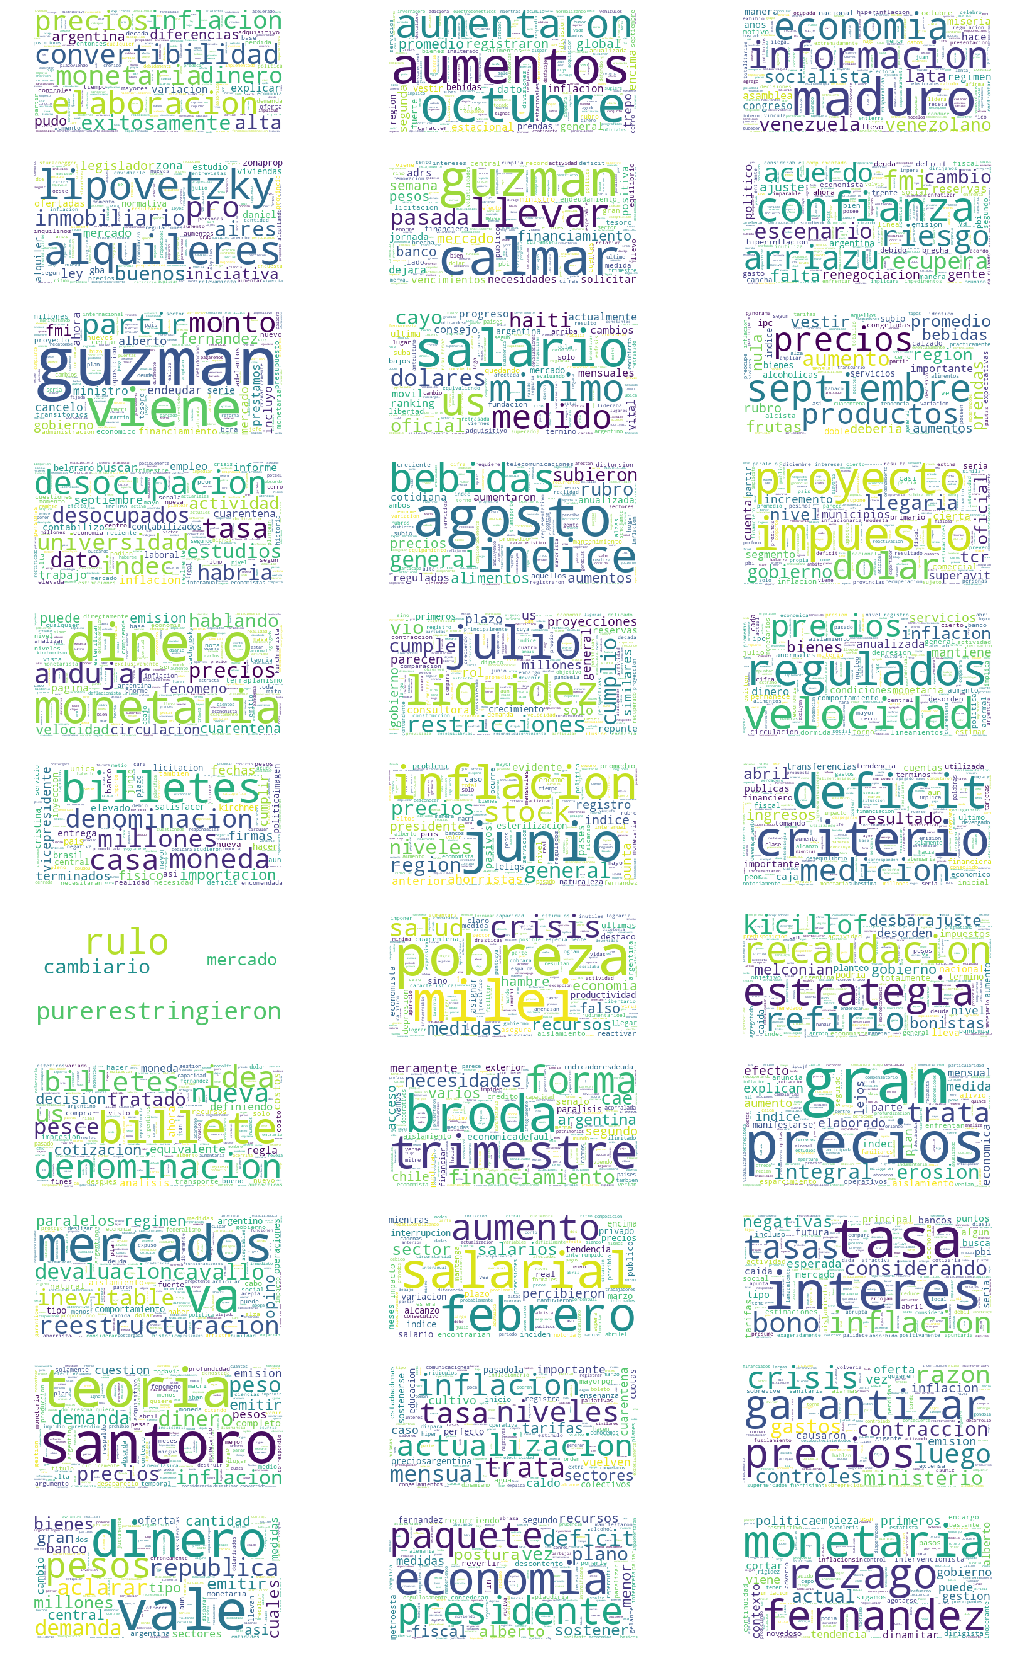

In [10]:
for row in range(tfidf_inf_df.shape[0]):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tfidf_inf_df.iloc[row].sort_values())
    plt.subplot(11, 3, row + 1)
    plt.imshow(cloud)
    plt.axis('off')
    
plt.show() 

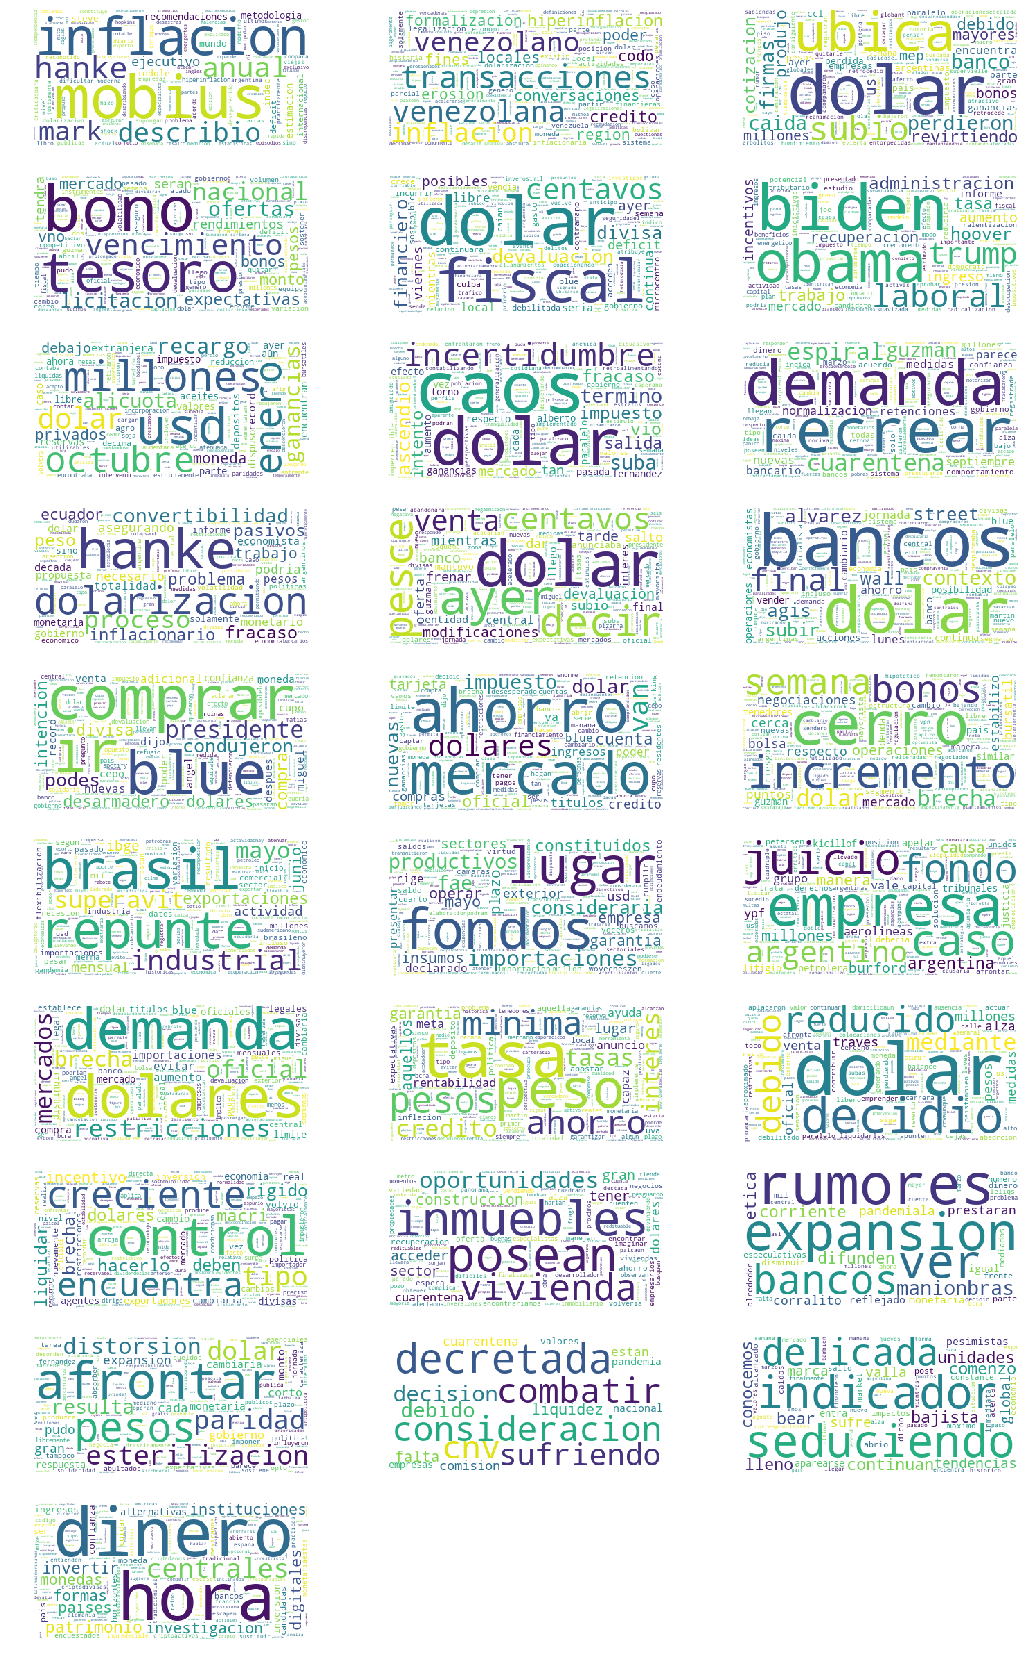

In [11]:
for row in range(tfidf_ex_df.shape[0]):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tfidf_ex_df.iloc[row].sort_values())
    plt.subplot(10, 3, row + 1)
    plt.imshow(cloud)
    plt.axis('off')
    
plt.show() 

#### Tf IDf per topic
See top rated terms amid documents of the same topic

(-0.5, 399.5, 199.5, -0.5)

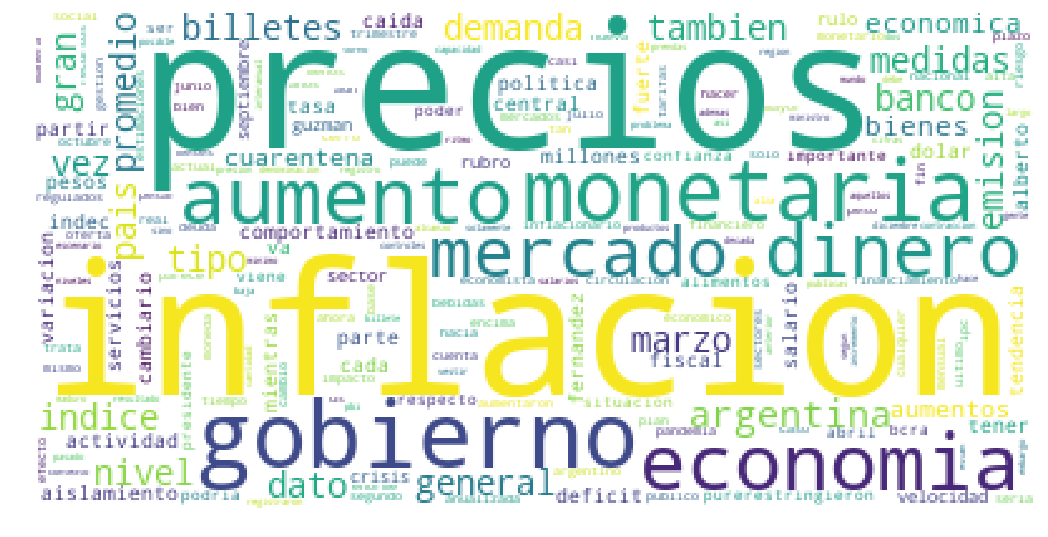

In [12]:
cloud = WordCloud(background_color='white')
cloud.generate_from_frequencies(tfidf_inf_df.sum(axis=0).sort_values())
plt.imshow(cloud)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

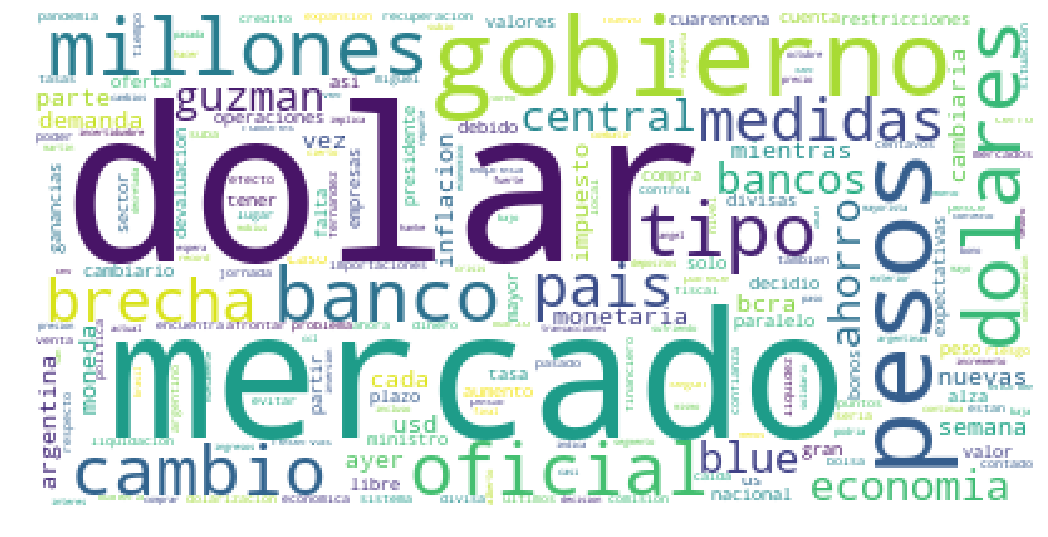

In [13]:
cloud = WordCloud(background_color='white')
cloud.generate_from_frequencies(tfidf_ex_df.sum(axis=0).sort_values())
plt.imshow(cloud)
plt.axis('off')

## Combinations

In [14]:
tfidf = TfidfTransformer().fit_transform(tokens.drop('topics', axis=1))
tfidf_df = pd.DataFrame(tfidf.todense(), columns = tokens.drop('topics', axis=1).columns)

### PCA

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=2).fit(tfidf_df)
pca_tfidf = pca.transform(tfidf_df)

#### Plot

In [17]:
import plotly.graph_objects as go

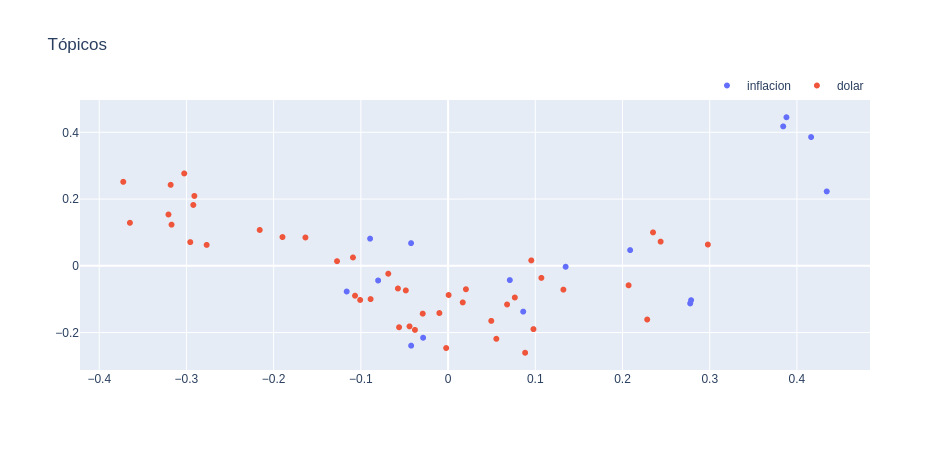

In [18]:
fig = go.Figure()

labels = ['t' + str(i) for i in range(len(tfidf_df[:]))]

fig.add_trace(go.Scatter(
    x = pca_tfidf[:16,0], y = pca_tfidf[:16,1],
    mode ='markers',
    text = labels[:16],
    textposition="middle left",
    name='inflacion'
))
fig.add_trace(go.Scatter(
    x = pca_tfidf[17:,0], y = pca_tfidf[17:,1],
    mode ='markers',
    text = labels[17:],
    textposition="middle left",
    name='dolar'
))

fig.update_layout(title='Tópicos', 
                  xaxis_zeroline=True,
                  legend=dict(
                        orientation="h",
                        yanchor="bottom",
                        y=1,
                        xanchor="right",
                        x=1
                  )
)

fig.show()

### SVD

In [19]:
from sklearn.decomposition import TruncatedSVD

In [20]:
svd = TruncatedSVD(n_components = 2) # n_components = Desired dimensionality of output data. Must be strictly less than the number of features.
p = svd.fit_transform(tfidf_df)
# p = svd.fit_transform(tokens.drop('topics', axis=1))
P = np.around(p,3)

#### Plot

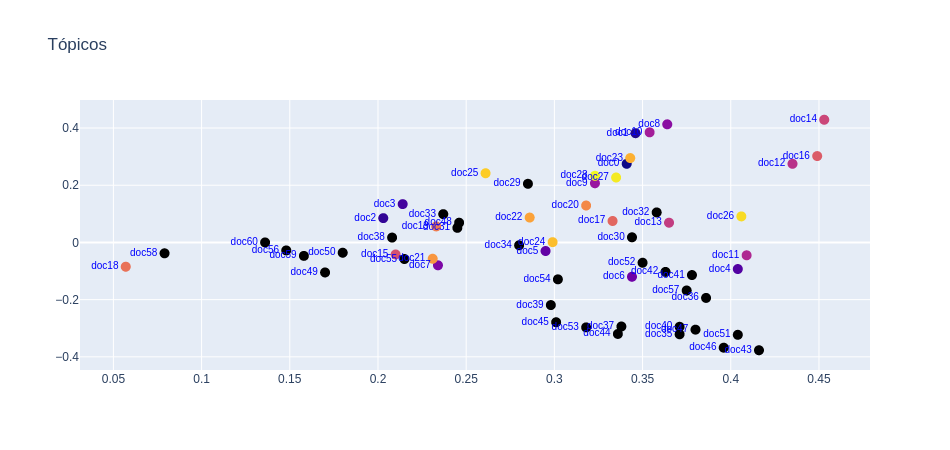

In [21]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x = P[:,0], y = P[:,1],
    mode ='markers+text',
    text = ['doc' + str(i) for i in range(len(tfidf_df))],
    marker = dict(
        size = 10,
        color = list(range(29)),
    ),
    textposition="middle left",
    textfont=dict(
        size=10,
        color="Blue"
    )
))
fig.update_layout(title='Tópicos', xaxis_zeroline=True)

fig.show()

In [22]:
comp1, comp2 = svd.components_

In [23]:
indices1 = np.argsort(comp1)

In [24]:
indices1 = indices1[::-1]
indices1[:20]

array([2426, 1534, 3469, 2155, 2867, 2944,  478, 3363, 1567, 4394, 2835,
        515, 2902, 1471, 1535, 3187,  387, 2187,  652,  731])

In [25]:
indices2 = np.argsort(comp2)
indices2 = indices2[::-1]

In [26]:
indices2[:20]

array([3469, 2426, 2404,  478, 3595,  479, 1471, 1198, 3864, 4029,  233,
       2127,  544,  537,  321, 4574, 2392, 2548, 2860, 4559])

In [27]:
dim1 = np.array(tfidf_df.columns)[indices1]
print(f'Dimensión 1:\n{dim1[:50]}')

Dimensión 1:
['inflacion' 'dolar' 'precios' 'gobierno' 'mercado' 'monetaria' 'aumento'
 'pesos' 'economia' 'tipo' 'medidas' 'banco' 'millones' 'dinero' 'dolares'
 'pais' 'argentina' 'guzman' 'cambio' 'central' 'demanda' 'oficial' 'gran'
 'nivel' 'emision' 'brecha' 'vez' 'cada' 'parte' 'mientras' 'bcra'
 'general' 'tasa' 'politica' 'indice' 'tambien' 'cuarentena' 'caida'
 'semana' 'marzo' 'partir' 'economica' 'dato' 'comportamiento' 'fernandez'
 'blue' 'presidente' 'impuesto' 'ahorro' 'bancos']


In [28]:
dim2 = np.array(tfidf_df.columns)[indices2]
print(f'Dimensión 2:\n{dim2[:50]}')

Dimensión 2:
['precios' 'inflacion' 'indice' 'aumento' 'promedio' 'aumentos' 'dinero'
 'dato' 'regulados' 'rubro' 'alimentos' 'general' 'bienes' 'bebidas'
 'anualizada' 'velocidad' 'indec' 'ipc' 'mensual' 'variacion' 'servicios'
 'aumentaron' 'septiembre' 'region' 'prendas' 'vestir' 'nivel' 'monetaria'
 'tarifas' 'actividad' 'comportamiento' 'registraron' 'emision' 'encima'
 'tendencia' 'alta' 'circulacion' 'marzo' 'gran' 'cuarentena'
 'aislamiento' 'calzado' 'productos' 'niveles' 'estacional' 'junio'
 'abril' 'rubros' 'economia' 'interanual']
